In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
sns.set()

In [2]:
def nD_to_2D(df, chosenColumns):
    c0 = chosenColumns[0]
    c1 = chosenColumns[1]
    param0 = df[c0].unique()
    param1 = df[c1].unique()
    df_2D = pd.DataFrame(columns = [c0, c1, 'winRate'])
    for p0 in param0:
        for p1 in param1:
            data = df[(df[c0] == p0) & (df[c1] == p1)]
            if data.shape[0] != 0:
                winRate = sum(data['winRate']) / data.shape[0]
            else:
                winRate = 0
            df_2D.loc[len(df_2D)] = [p0, p1, winRate]
    return df_2D

In [3]:
vmin_weight = 0.6
vmax_weight = 0.75
name_p31 = 'alpha_w1'
name_p32 = 'alpha_w2'
name_p34 = 'alpha_w4'

In [4]:
weight_data = pd.read_csv('it1-6E.csv', index_col = 'ID')
weight_data.round(4)
weight_data.head()

,p31,p32,p33,p34,p35,p36,winRate
ID,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,0.67100
1,0.0,0.0,0.0,0.0,0.1,0.9,0.66550
2,0.0,0.0,0.0,0.0,0.2,0.8,0.67250
3,0.0,0.0,0.0,0.0,0.3,0.7,0.65850
4,0.0,0.0,0.0,0.0,0.4,0.6,0.66375


# p31 v p32

In [5]:
df_p31_p32 = nD_to_2D(weight_data, ['p31', 'p32'])
df_p31_p32 = df_p31_p32.rename(columns={'p31': name_p31, 'p32': name_p32})
df_p31_p32.head()

,alpha_w1,alpha_w2,winRate
0,0.0,0.0,0.621099
1,0.0,0.1,0.647575
2,0.0,0.2,0.663632
3,0.0,0.3,0.674319
4,0.0,0.4,0.682693


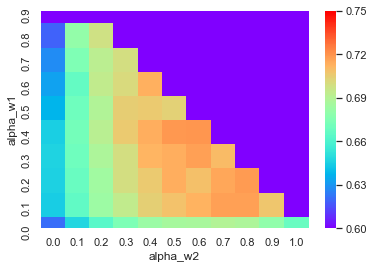

In [6]:
df_p31_p32_pivot = df_p31_p32.pivot(index=name_p31, columns=name_p32, values='winRate')
ax = sns.heatmap(df_p31_p32_pivot, vmin = vmin_weight, vmax = vmax_weight, cmap='rainbow') #, cmap='gray'
ax.invert_yaxis()
plt.savefig('p31_vs_p32.png', dpi=300)
plt.show()

# p32 v p34

In [7]:
df_p32_p34 = nD_to_2D(weight_data, ['p32', 'p34'])
df_p32_p34 = df_p32_p34.rename(columns={'p32': name_p32, 'p34': name_p34})
df_p32_p34.head()

,alpha_w2,alpha_w4,winRate
0,0.0,0.0,0.685107
1,0.0,0.1,0.684866
2,0.0,0.2,0.653345
3,0.0,0.3,0.619015
4,0.0,0.4,0.575515


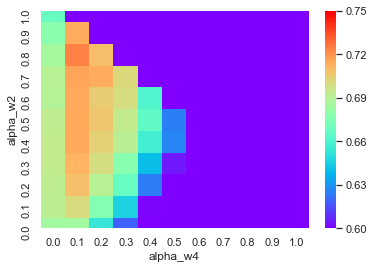

In [8]:
df_p32_p34_pivot = df_p32_p34.pivot(index=name_p32, columns=name_p34, values='winRate')
ax = sns.heatmap(df_p32_p34_pivot, vmin = vmin_weight, vmax = vmax_weight, cmap='rainbow') #, cmap='gray'
ax.invert_yaxis()
plt.savefig('p32_vs_p34.png', dpi=300)
plt.show()